In [344]:
from ast import literal_eval
import pandas as pd
import numpy as np
import lucem_illud_2020

import scipy
import sklearn_extra
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.mixture

import pyLDAvis
import pyLDAvis.gensim
import gensim
import networkx as nx
from gensim.models import ldaseqmodel
from gensim.matutils import kullback_leibler
from gensim import models

import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns

from source import helper_functions as hf, cluster_fns
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
tal_df = hf.load_df('total_trans_normalized.csv')

In [5]:
tal_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
0,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Four: Act Four,This is Your Radio Playhouse. I'm Ira Glass. O...,"[[This, is, Your, Radio, Playhouse], [I, 'm, I...","[[radio, playhouse], [m, ira, glass], [ok, rig...","[[radio, playhouse], [be, ira, glass], [okay, ...","[This, is, Your, Radio, Playhouse, I, 'm, Ira,...","[radio, playhouse, be, ira, glass, okay, right...","[radio, playhouse, m, ira, glass, ok, right, r..."
1,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Three: Act Three,"Well, next on our little playhouse stage, we h...","[[Well, next, on, our, little, playhouse, stag...","[[little, playhouse, stage, mr, lawrence, steg...","[[little, playhouse, stage, mr, lawrence, steg...","[Well, next, on, our, little, playhouse, stage...","[little, playhouse, stage, mr, lawrence, stege...","[little, playhouse, stage, mr, lawrence, stege..."
2,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Two: Act Two,"Good morning. Glass, Jacobson & Associates.Hey...","[[Good, morning], [Glass, Jacobson, Associates...","[[good, morning], [glass, jacobson, associates...","[[good, morning], [glass, jacobson, associate]...","[Good, morning, Glass, Jacobson, Associates, H...","[good, morning, glass, jacobson, associate, he...","[good, morning, glass, jacobson, associates, h..."
3,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act One: Act One,"All right, Your Radio Playhouse. All right. I'...","[[All, right, Your, Radio, Playhouse], [All, r...","[[right, radio, playhouse], [right], [m, makin...","[[right, radio, playhouse], [right], [be, make...","[All, right, Your, Radio, Playhouse, All, righ...","[right, radio, playhouse, right, be, make, eye...","[right, radio, playhouse, right, m, making, ey..."
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."


## Prologue Clustering

### Flat Clustering

In [6]:
pro_df = tal_df[tal_df['act_name'] == 'Prologue']

In [7]:
pro_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."
6,2,Small Scale Sin,1995,https://www.thisamericanlife.org/2/transcript,Prologue,"OK, three boys, aged 13, 15, and 16. All three...","[[OK, three, boys, aged, 13, 15, and, 16], [Al...","[[ok, boys, aged], [chose, appear, fake, names...","[[okay, boy, age], [choose, appear, fake, name...","[OK, three, boys, aged, 13, 15, and, 16, All, ...","[okay, boy, age, choose, appear, fake, name, r...","[ok, boys, aged, chose, appear, fake, names, r..."
19,5,Anger and Forgiveness,1995,https://www.thisamericanlife.org/5/transcript,Prologue,Hi. It's Ira Glass recording this in 2006. An...,"[[Hi], [It, 's, Ira, Glass, recording, this, i...","[[hi], [ira, glass, recording], [listen, fifth...","[[hello], [ira, glass, record], [listen, 5, ep...","[Hi, It, 's, Ira, Glass, recording, this, in, ...","[hello, ira, glass, record, listen, 5, episode...","[hi, ira, glass, recording, listen, fifth, epi..."
28,6,Christmas,1995,https://www.thisamericanlife.org/6/transcript,Prologue,"From the WBEZ Chicago, it's Your Radio Playho...","[[From, the, WBEZ, Chicago, it, 's, Your, Radi...","[[wbez, chicago, radio, playhouse], [hi], [rev...","[[wbez, chicago, radio, playhouse], [hello], [...","[From, the, WBEZ, Chicago, it, 's, Your, Radio...","[wbez, chicago, radio, playhouse, hello, rever...","[wbez, chicago, radio, playhouse, hi, reverend..."
32,7,Quitting,1995,https://www.thisamericanlife.org/7/transcript,Prologue,"What will make you change? For most of us, it ...","[[What, will, make, you, change], [For, most, ...","[[change], [self, help, books, courses, learni...","[[change], [self, help, book, course, learn, a...","[What, will, make, you, change, For, most, of,...","[change, self, help, book, course, learn, anne...","[change, self, help, books, courses, learning,..."


In [8]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
pro_vects = CountVectorizer.fit_transform(pro_df['text'])
print(pro_vects.shape)

(627, 20775)


In [9]:
# tf-idf
proTFTransformer = sklearn.feature_extraction.text. \
                           TfidfTransformer().fit(pro_vects)
#train
proTF = proTFTransformer.transform(pro_vects)
print(proTF.shape)

(627, 20775)


In [10]:
# examine the words with the highest TF IDF score
x = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), proTF.data)))
x.columns=['word','TFIDF score']
x = x.sort_values('TFIDF score', ascending=False)
x.iloc[:20]

,word,TFIDF score
20262,nonwhite,0.809570
20745,feedback,0.567849
2813,splendor,0.543890
6805,suffered,0.538531
17070,custody,0.515066
8316,primaries,0.481242
17699,blasted,0.472924
10083,herding,0.463036
1543,crisscrossing,0.456382
5215,pillow,0.447737


In [11]:
proTFVectorizer, proTFVects = cluster_fns.make_vec_vectorizer(pro_df)

#### Gaussian

In [12]:
gauss_clf = cluster_fns.make_train(3, proTFVects.todense(), 'gauss')
labels = gauss_clf.predict(proTFVects.todense())

Top terms per cluster:
Cluster 0:
mom
dad
kids
family
parents
mother
father
old
year
kid


Cluster 1:
guy
love
person
ok
oh
good
sort
feel
woman
women


Cluster 2:
school
new
money
government
war
country
state
year
car
big




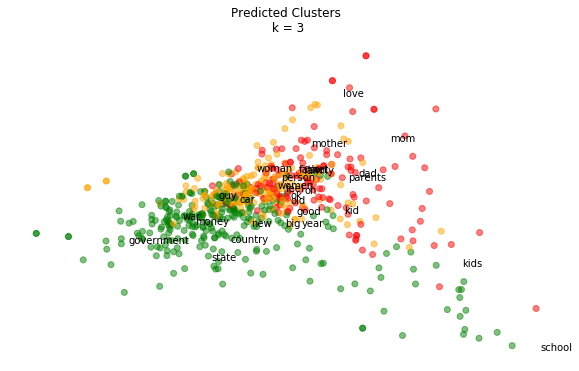

In [13]:
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, gauss_clf, 'gauss', 3, labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


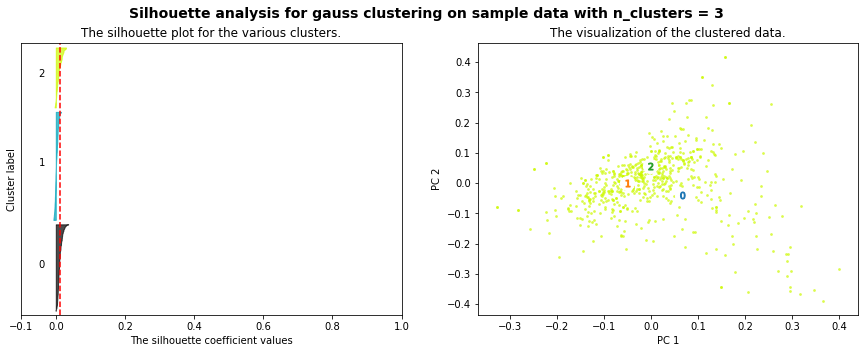

For n_clusters = 3, The average silhouette_score is : 0.011


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


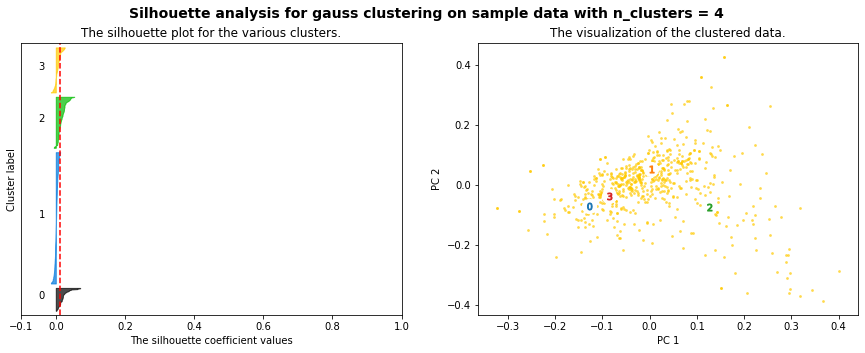

For n_clusters = 4, The average silhouette_score is : 0.012


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


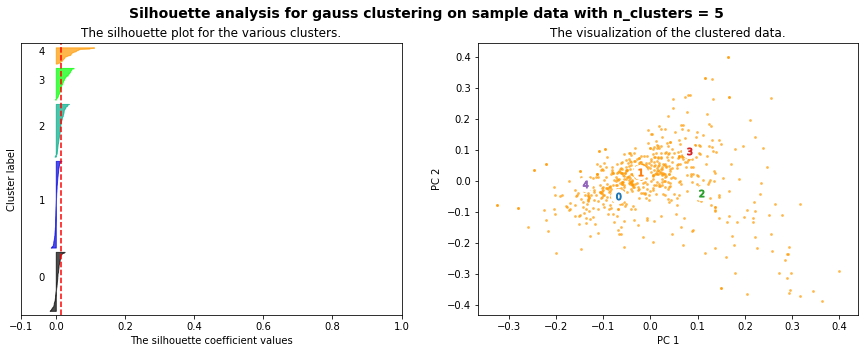

For n_clusters = 5, The average silhouette_score is : 0.015


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


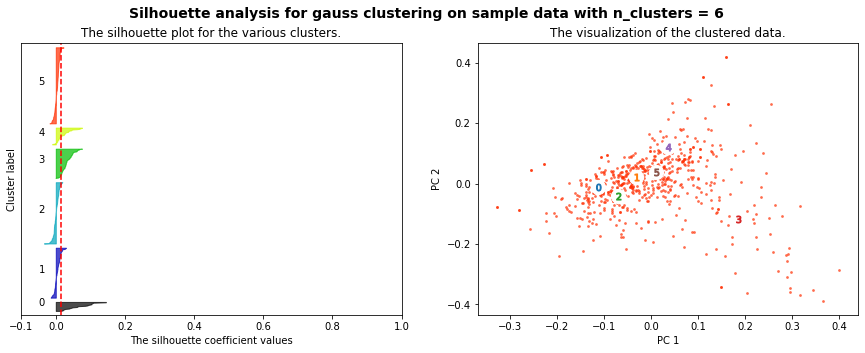

For n_clusters = 6, The average silhouette_score is : 0.016


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


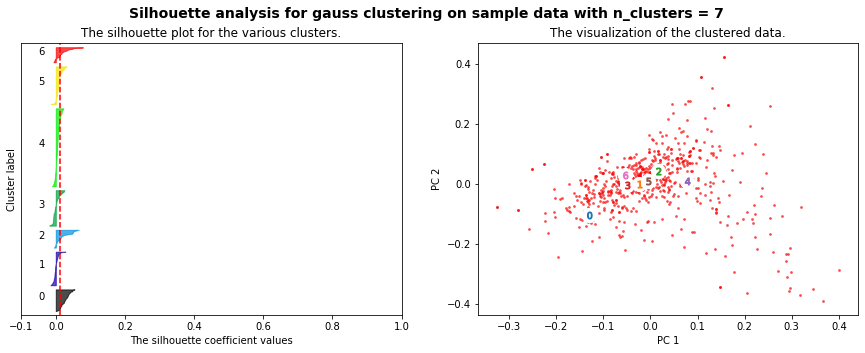

For n_clusters = 7, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


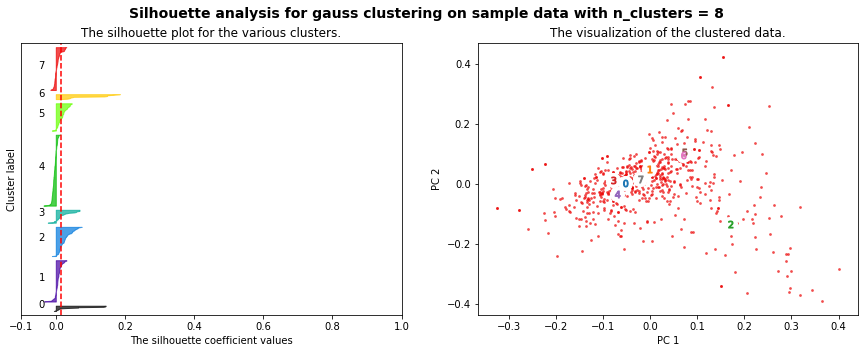

For n_clusters = 8, The average silhouette_score is : 0.016


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


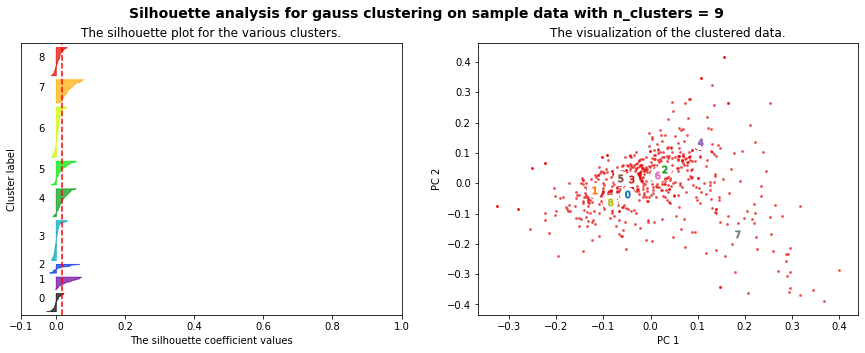

For n_clusters = 9, The average silhouette_score is : 0.019


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


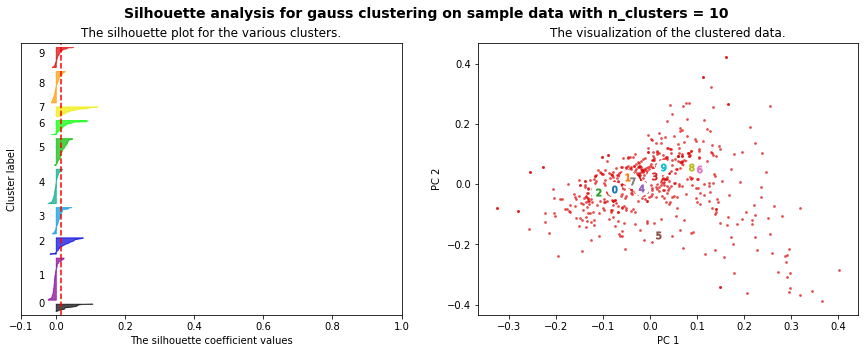

For n_clusters = 10, The average silhouette_score is : 0.016


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


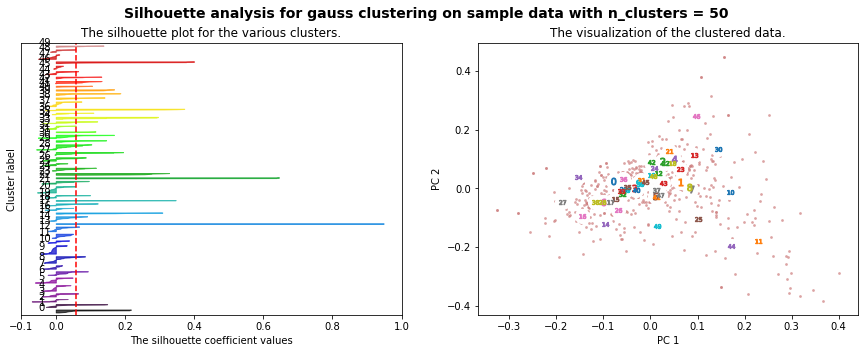

For n_clusters = 50, The average silhouette_score is : 0.058


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


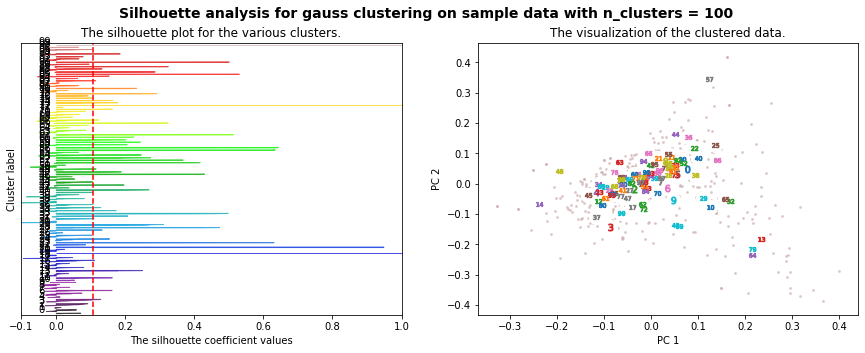

For n_clusters = 100, The average silhouette_score is : 0.108


In [14]:
range_lst = list(range(3, 11)) + [50, 100] 
for i in range_lst:
    X = proTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'gauss', proTFVects)

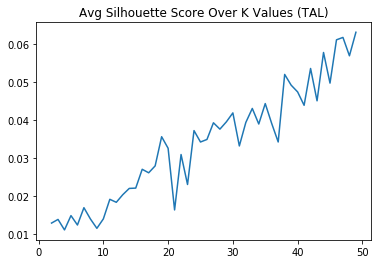

In [93]:
cluster_fns.plot_avg_sil(proTFVects, 'gauss')

This looks like it steep declines at 20 and at 10. Below we focus on clustering w/ 9 groups as 19 is too much to analyze?

Top terms per cluster:
Cluster 0:
john
dark
watch
state
marriage
gang
episode
fish
copy
movie


Cluster 1:
doctor
dr
blah
scene
scott
medical
crime
hospital
called
episode


Cluster 2:
love
mom
mother
person
dad
sort
ok
father
thought
talk


Cluster 3:
new
money
guy
city
year
job
world
ok
york
house


Cluster 4:
school
kids
schools
high
students
girls
class
kid
tooth
year


Cluster 5:
president
government
republican
country
state
states
political
united
party
democrats


Cluster 6:
car
guy
book
good
number
remember
happened
man
ll
old


Cluster 7:
christmas
santa
jokes
mom
love
david
parents
new
year
special


Cluster 8:
war
iraq
enemy
different
military
middle
world
maybe
acts
air




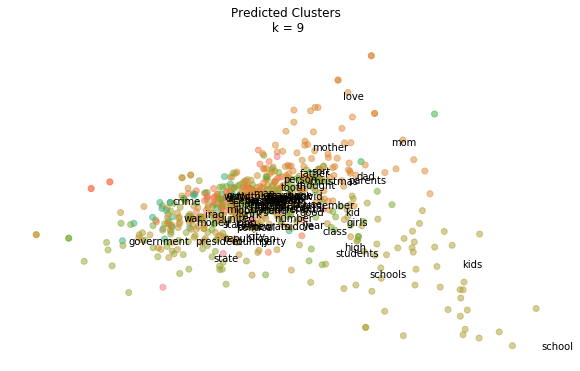

In [19]:
clust_num = 9
gauss_clf = cluster_fns.make_train(clust_num, proTFVects.todense(), 'gauss')
labels = gauss_clf.predict(proTFVects.todense())
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, gauss_clf, 'gauss', clust_num, labels)

#### K-Means

Top terms per cluster:
Cluster 0:
mom
dad
mother
family
father
parents
children
felt
love
cat


Cluster 1:
guy
new
world
money
ok
good
job
doing
car
mean


Cluster 2:
school
kids
love
christmas
girl
high
year
schools
girls
friends




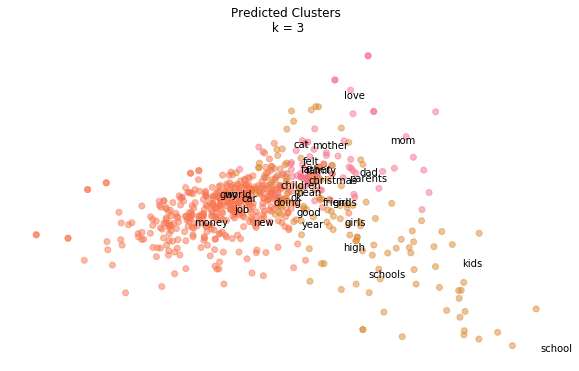

In [21]:
km_clf = cluster_fns.make_train(3, proTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, km_clf, 'km', 3, labels)

Top terms per cluster:
Cluster 0:
school
kids
mom
christmas
schools
dad
parents
girls
high
kid


Cluster 1:
guy
love
person
new
world
ok
man
good
oh
car


Cluster 2:
government
war
police
president
country
state
new
states
case
iraq




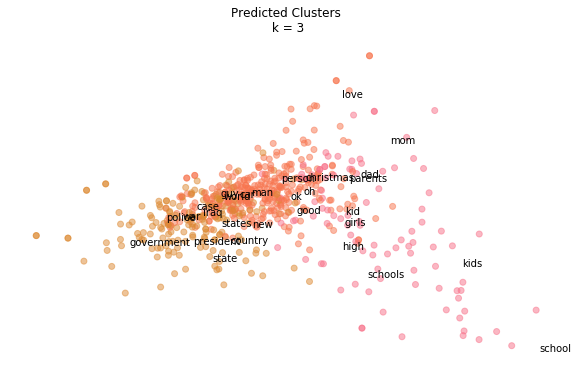

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


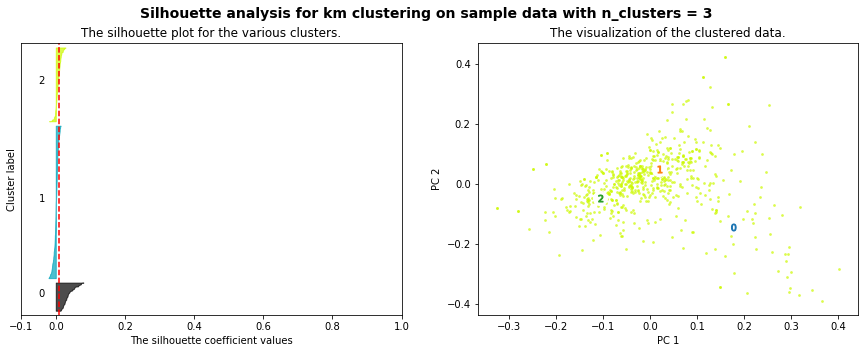

For n_clusters = 3, The average silhouette_score is : 0.010


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


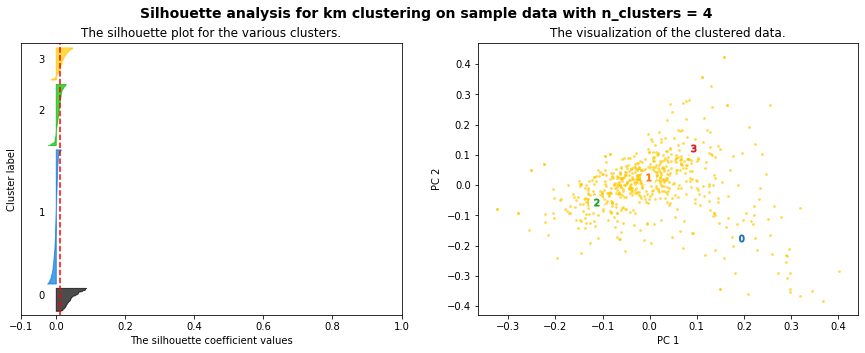

For n_clusters = 4, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


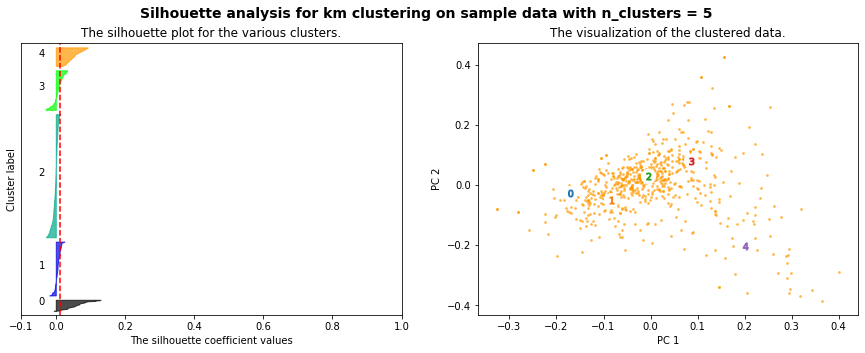

For n_clusters = 5, The average silhouette_score is : 0.013


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


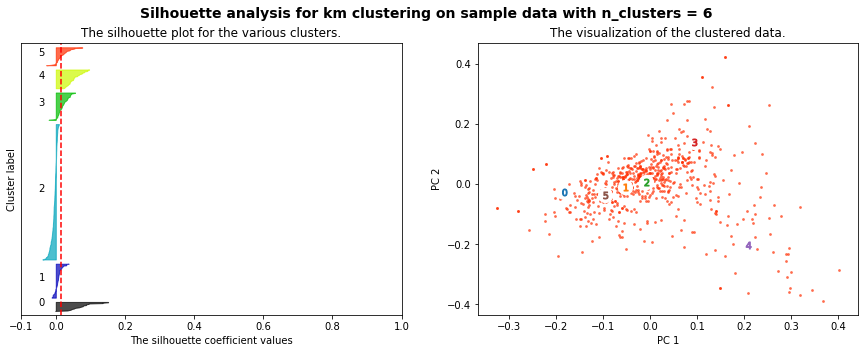

For n_clusters = 6, The average silhouette_score is : 0.014


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


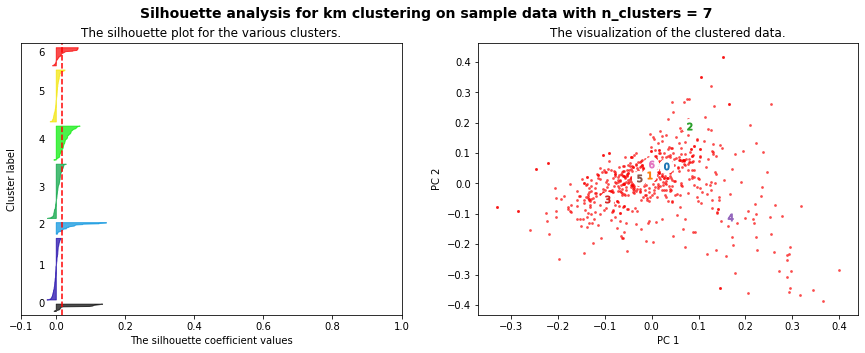

For n_clusters = 7, The average silhouette_score is : 0.017


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


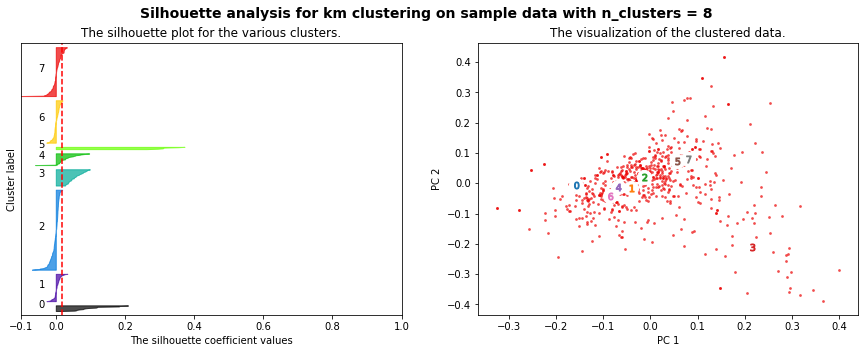

For n_clusters = 8, The average silhouette_score is : 0.019


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


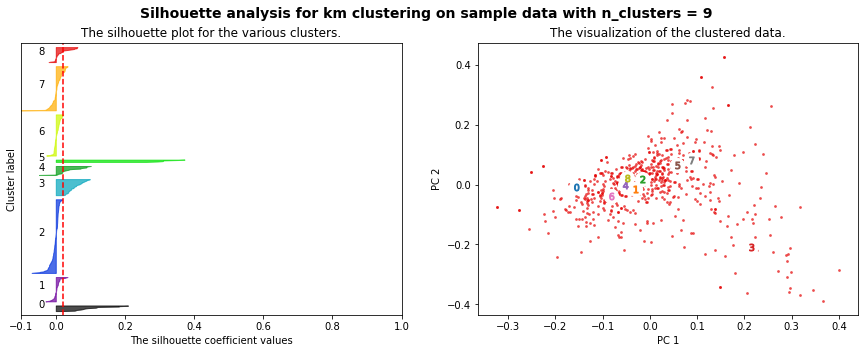

For n_clusters = 9, The average silhouette_score is : 0.021


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


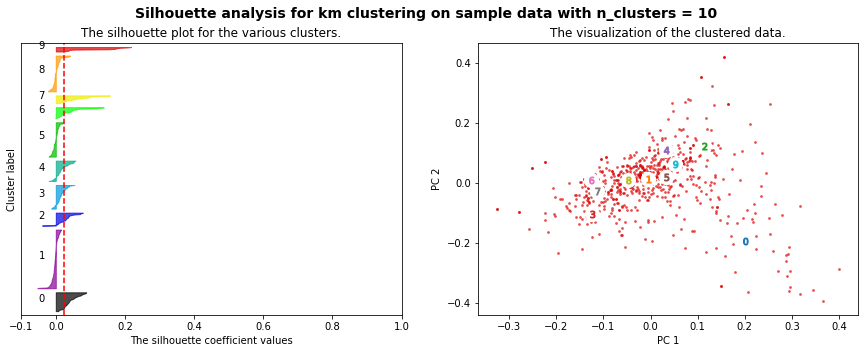

For n_clusters = 10, The average silhouette_score is : 0.023


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


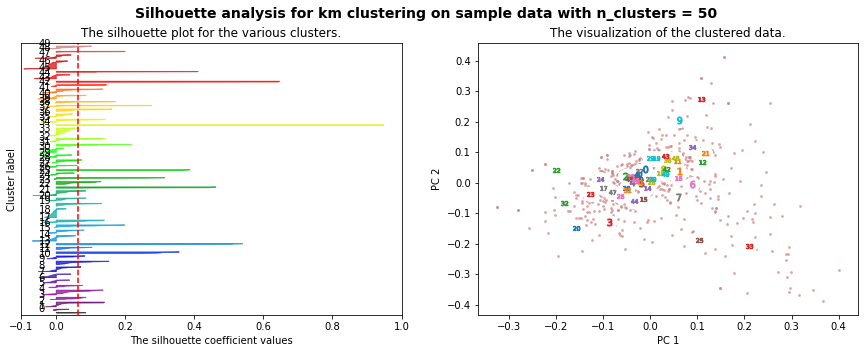

For n_clusters = 50, The average silhouette_score is : 0.064


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


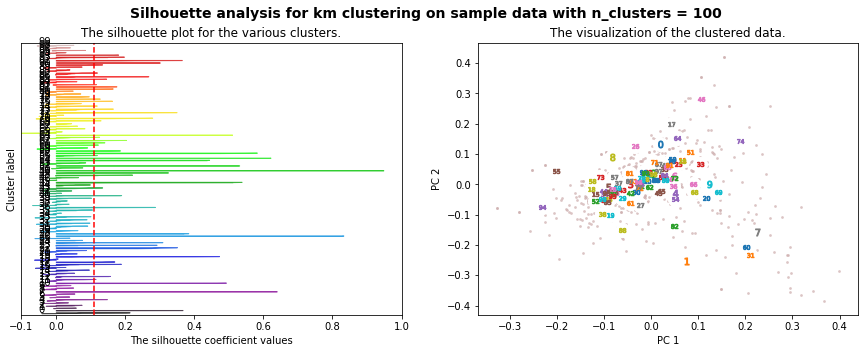

For n_clusters = 100, The average silhouette_score is : 0.110


In [20]:
range_lst = list(range(3, 11)) + [50, 100] 
for i in range_lst:
    X = proTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'km', proTFVects)

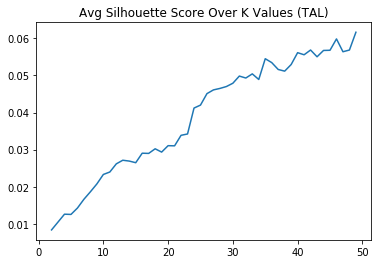

In [95]:
cluster_fns.plot_avg_sil(proTFVects, 'km')

Top terms per cluster:
Cluster 0:
mom
mother
family
episode
mary
advice
children
father
baby
parents


Cluster 1:
christmas
santa
mom
love
store
jokes
present
year
david
new


Cluster 2:
love
cat
sort
person
british
woman
girl
felt
gay
sean


Cluster 3:
school
kids
schools
students
high
year
girls
class
teachers
big


Cluster 4:
guy
car
man
black
phone
good
police
help
person
woman


Cluster 5:
money
financial
price
year
bank
market
doing
boyfriend
street
crisis


Cluster 6:
republican
election
campaign
president
party
political
democrats
republicans
country
politics


Cluster 7:
government
crime
case
court
police
cases
fbi
lawyer
state
law


Cluster 8:
world
war
guy
ok
new
job
oh
doing
different
thought


Cluster 9:
house
gas
bed
room
beer
sick
sleep
table
mr
happened


Cluster 10:
dad
book
tooth
father
fairy
kid
remember
parents
kids
old




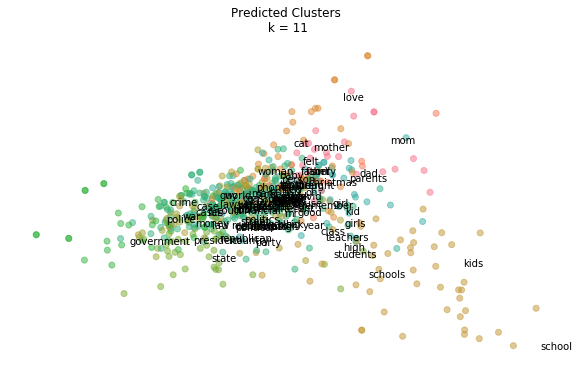

In [22]:
# so let's check out 11 groups?
km_clf = cluster_fns.make_train(11, proTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(proTFVects, proTFVectorizer, km_clf, 'km', 11, labels)

#### DBSCAN

In [23]:
dbscan_clf = cluster_fns.make_train(3, proTFVects, 'dbscan')
labels = dbscan_clf.labels_

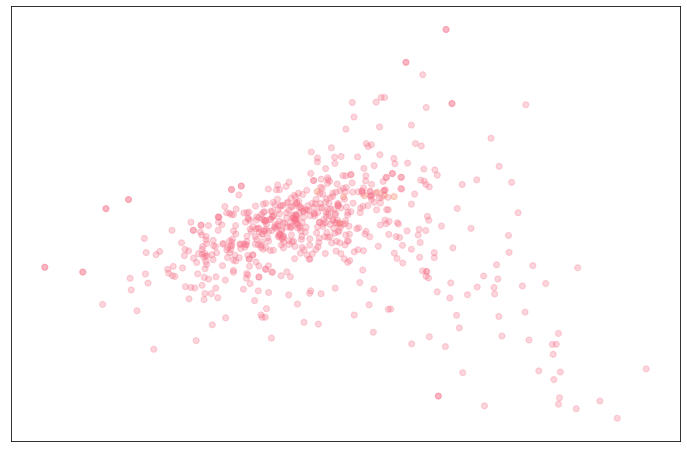

In [24]:
cluster_fns.plot_dbscan(proTFVects, proTFVectorizer, labels)

In [25]:
sklearn.metrics.silhouette_score(proTFVects.toarray(), labels, metric='cosine')

0.03196774949930009

In [28]:
pro_df['dbscan_labs'] = labels

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
pro_df[pro_df['dbscan_labs'] == 0]

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens,dbscan_labs
28,6,Christmas,1995,https://www.thisamericanlife.org/6/transcript,Prologue,"From the WBEZ Chicago, it's Your Radio Playho...","[[From, the, WBEZ, Chicago, it, 's, Your, Radi...","[[wbez, chicago, radio, playhouse], [hi], [rev...","[[wbez, chicago, radio, playhouse], [hello], [...","[From, the, WBEZ, Chicago, it, 's, Your, Radio...","[wbez, chicago, radio, playhouse, hello, rever...","[wbez, chicago, radio, playhouse, hi, reverend...",0
396,87,A Very Special Sedaris Christmas,1997,https://www.thisamericanlife.org/87/transcript,Prologue,"So David was working, making his living as a ...","[[So, David, was, working, making, his, living...","[[david, working, making, living, maid, basica...","[[david, work, make, live, maid, basically, cl...","[So, David, was, working, making, his, living,...","[david, work, make, live, maid, basically, cle...","[david, working, making, living, maid, basical...",0
670,148,The Angels Wanna Wear My Red Suit,1999,https://www.thisamericanlife.org/148/transcript,Prologue,"Oh come all ye faithful, joyful, and triumphan...","[[Oh, come], [all, ye, faithful, joyful, and, ...","[[oh, come], [ye, faithful, joyful, triumphant...","[[oh, come], [ye, faithful, joyful, triumphant...","[Oh, come, all, ye, faithful, joyful, and, tri...","[oh, come, ye, faithful, joyful, triumphant, l...","[oh, come, ye, faithful, joyful, triumphant, l...",0
1191,255,This American Life’s Holiday Gift-Giving Guide,2003,https://www.thisamericanlife.org/255/transcript,Prologue,"One week before Christmas, the Target store o...","[[One, week, before, Christmas, the, Target, s...","[[week, christmas, target, store, chicago, wes...","[[week, christmas, target, store, chicago, wes...","[One, week, before, Christmas, the, Target, st...","[week, christmas, target, store, chicago, west...","[week, christmas, target, store, chicago, west...",0
1405,305,The This American Life Holiday Spectacular,2005,https://www.thisamericanlife.org/305/transcript,Prologue,"Hello everyone. Ladies and gentlemen, happy h...","[[Hello, everyone], [Ladies, and, gentlemen, h...","[[hello], [ladies, gentlemen, happy, holidays]...","[[hello], [lady, gentleman, happy, holiday], [...","[Hello, everyone, Ladies, and, gentlemen, happ...","[hello, lady, gentleman, happy, holiday, ira, ...","[hello, ladies, gentlemen, happy, holidays, ir...",0
1938,422,Comedians of Christmas Comedy Special,2010,https://www.thisamericanlife.org/422/transcript,Prologue,Everybody knows the holidays can be stressful....,"[[Everybody, knows, the, holidays, can, be, st...","[[everybody, knows, holidays, stressful], [hol...","[[everybody, know, holiday, stressful], [holid...","[Everybody, knows, the, holidays, can, be, str...","[everybody, know, holiday, stressful, holiday,...","[everybody, knows, holidays, stressful, holida...",0
2575,576,Say Yes To Christmas,2015,https://www.thisamericanlife.org/576/transcript,Prologue,"From WBEZ Chicago, it's a special Christmas ed...","[[From, WBEZ, Chicago, it, 's, a, special, Chr...","[[wbez, chicago, special, christmas, edition, ...","[[wbez, chicago, special, christmas, edition, ...","[From, WBEZ, Chicago, it, 's, a, special, Chri...","[wbez, chicago, special, christmas, edition, a...","[wbez, chicago, special, christmas, edition, a...",0


LOL DBSCAN picked up on the xmas ep prologues

I think we can probably say something about Christianity still stong in the US?

### Hierarchical

In [35]:
pro_cooc_mat, pro_linkage_mat = cluster_fns.make_coor_mat(proTFVects)

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


hier
{'get_leaves': True, 'p': 4, 'truncate_mode': 'level'}


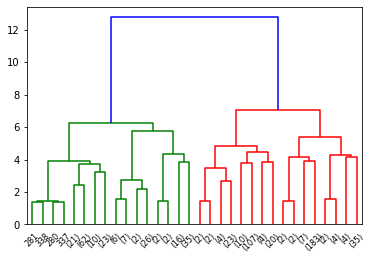

In [36]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'hier')

In [37]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'flat')

flat
{'criterion': 'maxclust', 't': 2}
0.09753166625879549
flat
{'criterion': 'maxclust', 't': 4}
0.04458671798886995
flat
{'criterion': 'maxclust', 't': 6}
0.03790307549757094
flat
{'criterion': 'distance', 't': 2}
0.048382316383108845
flat
{'criterion': 'distance', 't': 4}
0.04123805795208006
flat
{'criterion': 'distance', 't': 6}
0.04458671798886995


## Episode Clustering

In [46]:
ep_df = hf.agg_text(tal_df, 'ep_title', True)
ep_df.head()

,ep_title,ep_num,year,url,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
0,A Better Mousetrap,311,2006,https://www.thisamericanlife.org/311/transcript,Andy's grandfather ran the business. Then his ...,"[[Andy, 's, grandfather, ran, the, business], ...","[[andy, grandfather, ran, business], [father, ...","[[andy, grandfather, run, business], [father, ...","[Andy, 's, grandfather, ran, the, business, Th...","[andy, grandfather, run, business, father, run...","[andy, grandfather, ran, business, father, ran..."
1,A Better Mousetrap 2008,366,2008,https://www.thisamericanlife.org/366/transcript,"Act Four, ""The Not-For-Profit Motive."" In resp...","[[Act, Four, The, Not, For, Profit, Motive], [...","[[act, profit, motive], [], [responding, curre...","[[act, profit, motive], [], [respond, current,...","[Act, Four, The, Not, For, Profit, Motive, In,...","[act, profit, motive, respond, current, financ...","[act, profit, motive, responding, current, fin..."
2,A Front,540,2014,https://www.thisamericanlife.org/540/transcript,"Act One, WTF, ATF? So a funny thing happened a...","[[Act, One, WTF, ATF], [So, a, funny, thing, h...","[[act, wtf, atf], [funny, thing, happened, joh...","[[act, wtf, atf], [funny, thing, happen, john,...","[Act, One, WTF, ATF, So, a, funny, thing, happ...","[act, wtf, atf, funny, thing, happen, john, ra...","[act, wtf, atf, funny, thing, happened, john, ..."
3,A House Divided,439,2011,https://www.thisamericanlife.org/439/transcript,It's This American Life. I'm Ira Glass. Each w...,"[[It, 's, This, American, Life], [I, 'm, Ira, ...","[[american, life], [m, ira, glass], [week, cou...","[[american, life], [be, ira, glass], [week, co...","[It, 's, This, American, Life, I, 'm, Ira, Gla...","[american, life, be, ira, glass, week, course,...","[american, life, m, ira, glass, week, course, ..."
4,A Little Bit of Knowledge,293,2005,https://www.thisamericanlife.org/293/transcript,It's This American Life. I'm Ira Glass. Each w...,"[[It, 's, This, American, Life], [I, 'm, Ira, ...","[[american, life], [m, ira, glass], [week, pro...","[[american, life], [be, ira, glass], [week, pr...","[It, 's, This, American, Life, I, 'm, Ira, Gla...","[american, life, be, ira, glass, week, program...","[american, life, m, ira, glass, week, program,..."


### Flat Clustering

In [47]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
ep_vects = CountVectorizer.fit_transform(ep_df['text'])
print(ep_vects.shape)

(677, 58974)


In [48]:
# tf-idf
epTFTransformer = sklearn.feature_extraction.text. \
                           TfidfTransformer().fit(ep_vects)
#train
epTF = epTFTransformer.transform(ep_vects)
print(epTF.shape)

(677, 58974)


In [49]:
# examine the words with the highest TF IDF score
x = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), epTF.data)))
x.columns=['word','TFIDF score']
x = x.sort_values('TFIDF score', ascending=False)
x.iloc[:20]

,word,TFIDF score
18473,wrongful,0.629710
11345,athens,0.563504
46950,conjectures,0.553147
9589,knit,0.531026
25613,nautical,0.527833
36143,binjamin,0.527146
20136,defect,0.517438
38060,preteens,0.514730
57941,baudelaire,0.512336
52274,creedence,0.501899


In [50]:
# lowest TF-IDF scores
x.iloc[-20:]

,word,TFIDF score
12260,disturbingly,0.000970
17033,curling,0.000965
16924,vega,0.000963
17786,saddest,0.000961
17185,roast,0.000960
17966,depressions,0.000936
17220,download,0.000923
18011,zach,0.000913
18444,flunk,0.000906
18398,measurement,0.000903


In [52]:
epTFVectorizer, epTFVects = cluster_fns.make_vec_vectorizer(ep_df)

#### Gaussian

In [53]:
gauss_clf = cluster_fns.make_train(3, epTFVects.todense(), 'gauss')
labels = gauss_clf.predict(epTFVects.todense())

Top terms per cluster:
Cluster 0:
republican
trump
spanish
president
government
police
immigration
vote
democrats
republicans


Cluster 1:
david
church
song
sex
john
girls
police
hospital
laughter
christmas


Cluster 2:
iraq
iraqi
arabic
americans
soldiers
military
sam
army
israel
al




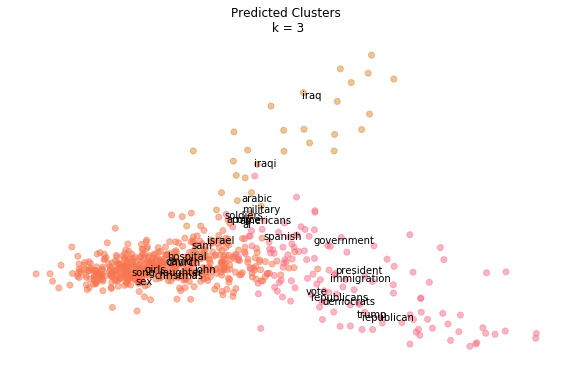

In [54]:
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, gauss_clf, 'gauss', 3, labels)

So I'm surprised that 3 clusters broken down like this? But I guess it would have to do w/ the flattening to a 2D representation?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


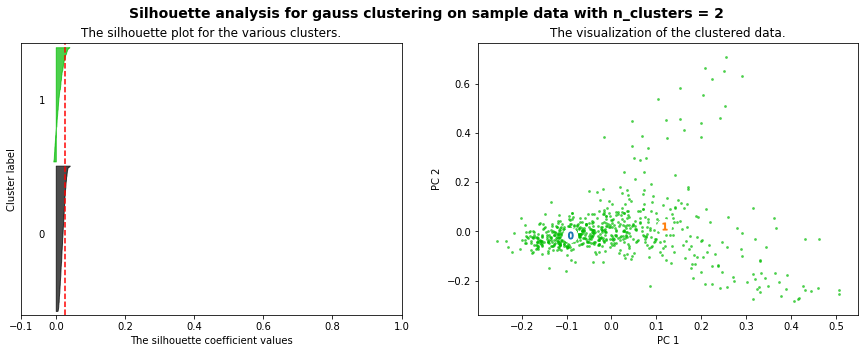

For n_clusters = 2, The average silhouette_score is : 0.027


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


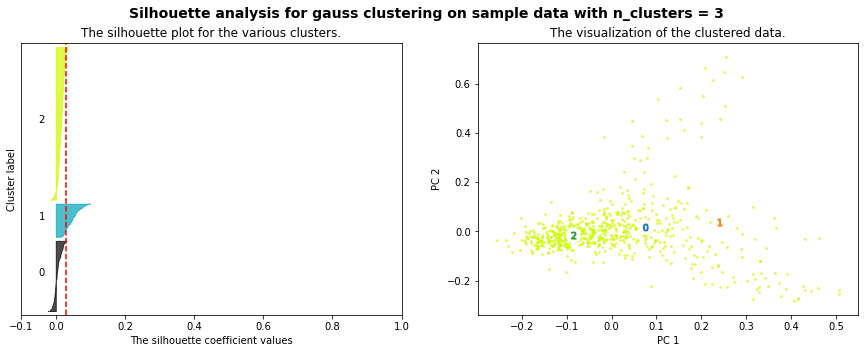

For n_clusters = 3, The average silhouette_score is : 0.030


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


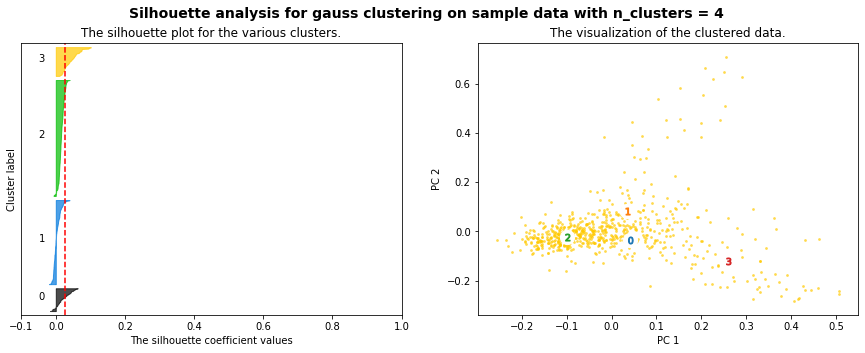

For n_clusters = 4, The average silhouette_score is : 0.027


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


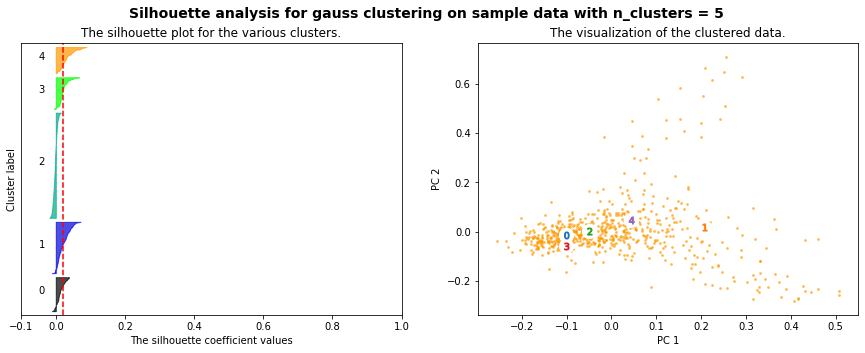

For n_clusters = 5, The average silhouette_score is : 0.019


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


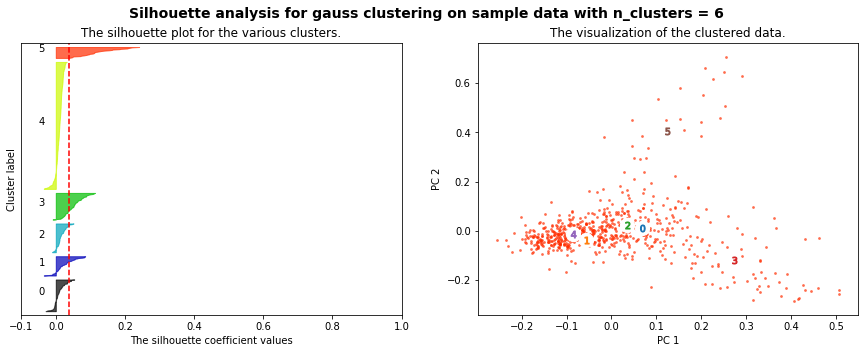

For n_clusters = 6, The average silhouette_score is : 0.038


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


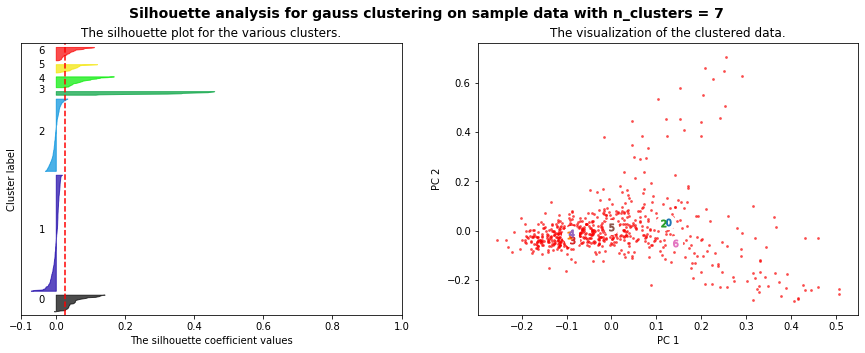

For n_clusters = 7, The average silhouette_score is : 0.027


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


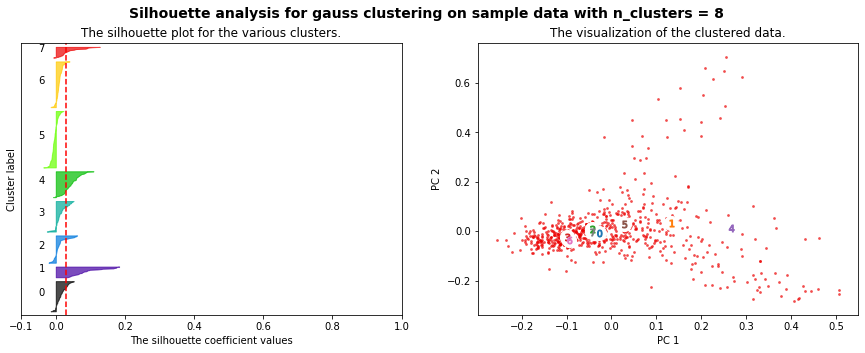

For n_clusters = 8, The average silhouette_score is : 0.029


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


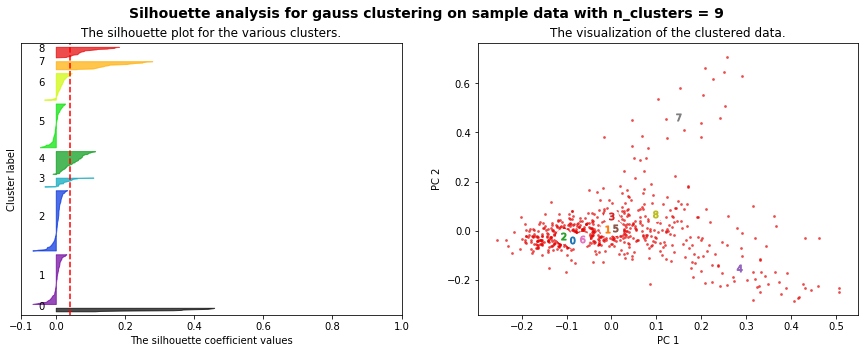

For n_clusters = 9, The average silhouette_score is : 0.041


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


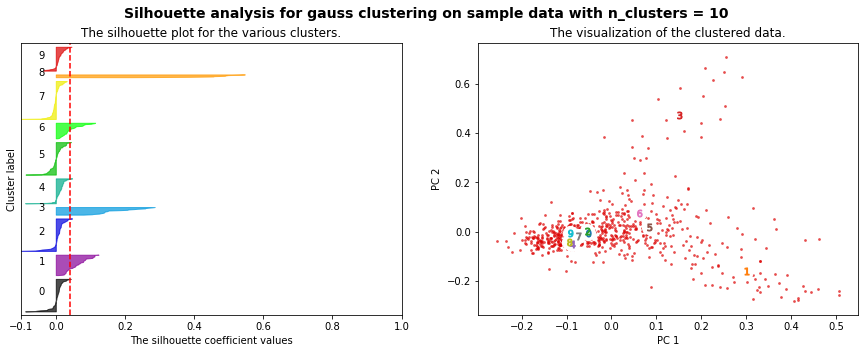

For n_clusters = 10, The average silhouette_score is : 0.040


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


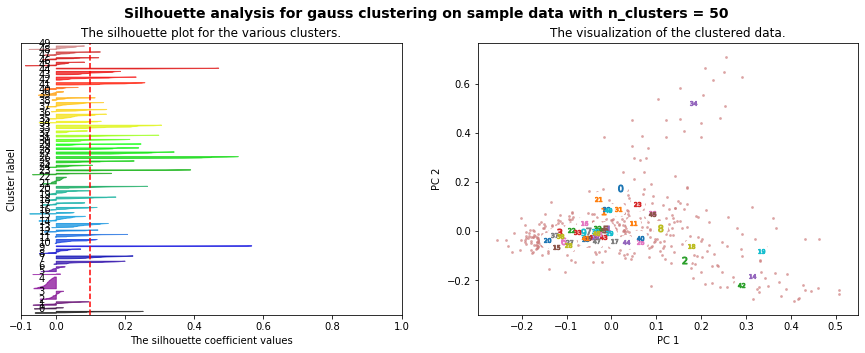

For n_clusters = 50, The average silhouette_score is : 0.099


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


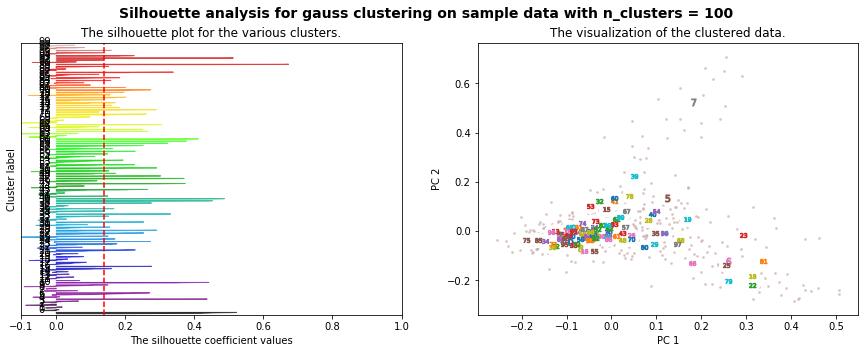

For n_clusters = 100, The average silhouette_score is : 0.138


In [55]:
range_lst = list(range(2, 11)) + [50, 100] 
for i in range_lst:
    X = epTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'gauss', epTFVects)

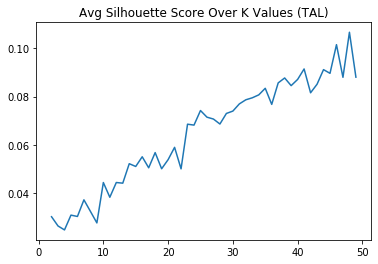

In [56]:
cluster_fns.plot_avg_sil(epTFVects, 'gauss')

Top terms per cluster:
Cluster 0:
church
dave
jesus
christmas
christian
bible
faith
lord
sex
girls


Cluster 1:
republican
trump
spanish
president
immigration
iraq
democrats
vote
republicans
government


Cluster 2:
sex
david
girls
john
gay
married
sarah
laughter
song
letter


Cluster 3:
chris
bank
banks
company
mortgage
financial
government
companies
mike
crisis


Cluster 4:
court
police
fbi
hospital
government
drug
cancer
doctor
prison
dr


Cluster 5:
chicken
song
truck
chinese
boat
bird
river
police
arabic
camp




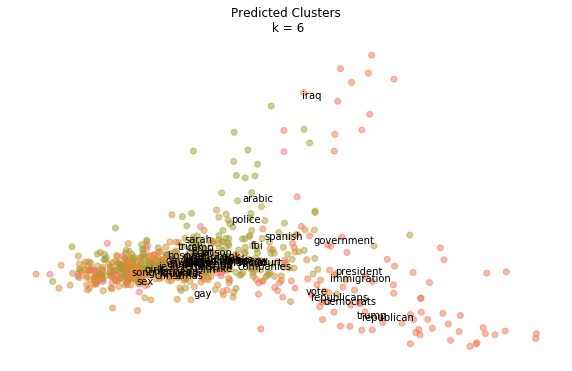

In [57]:
gauss_clf = cluster_fns.make_train(6, epTFVects.todense(), 'gauss')
labels = gauss_clf.predict(epTFVects.todense())
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, gauss_clf, 'gauss', 6, labels)

Top terms per cluster:
Cluster 0:
company
chris
bank
banks
mortgage
tim
companies
workers
financial
market


Cluster 1:
song
students
schools
prison
singing
josh
david
teachers
teacher
bob


Cluster 2:
trump
immigration
president
republican
immigrants
donald
border
republicans
democrats
spanish


Cluster 3:
police
iraq
government
spanish
fbi
iraqi
arabic
court
military
americans


Cluster 4:
chicken
bird
truck
boat
ron
dog
beach
bus
animals
river


Cluster 5:
hospital
cancer
insurance
doctor
doctors
patient
health
medical
dr
drug


Cluster 6:
republican
christmas
democrats
vote
santa
republicans
campaign
election
mccain
governor


Cluster 7:
sex
gay
john
laughter
dave
letters
married
girls
david
letter


Cluster 8:
church
bible
christian
jesus
lord
faith
marriage
sex
st
religious




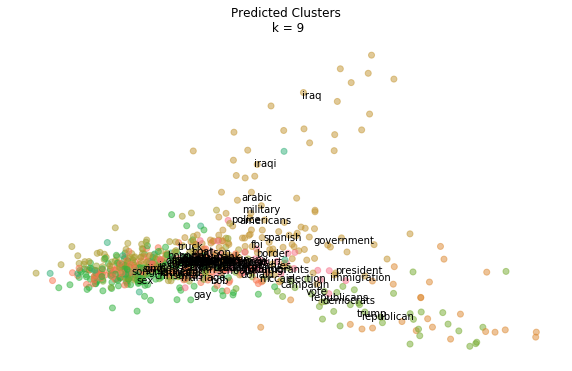

In [58]:
gauss_clf = cluster_fns.make_train(9, epTFVects.todense(), 'gauss')
labels = gauss_clf.predict(epTFVects.todense())
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, gauss_clf, 'gauss', 9, labels)

#### K Means

Top terms per cluster:
Cluster 0:
government
president
police
iraq
republican
spanish
trump
court
immigration
vote


Cluster 1:
david
church
song
sex
girls
laughter
john
singing
married
christmas




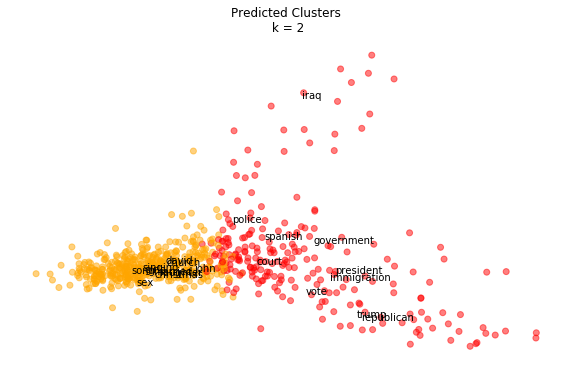

In [195]:
clust_num = 2
km_clf = cluster_fns.make_train(clust_num, epTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, km_clf, 'km', clust_num, labels)

Top terms per cluster:
Cluster 0:
police
government
iraq
spanish
chicken
students
fbi
company
court
arabic


Cluster 1:
david
song
sex
church
girls
hospital
married
singing
john
christmas


Cluster 2:
republican
trump
democrats
vote
president
republicans
immigration
obama
campaign
election




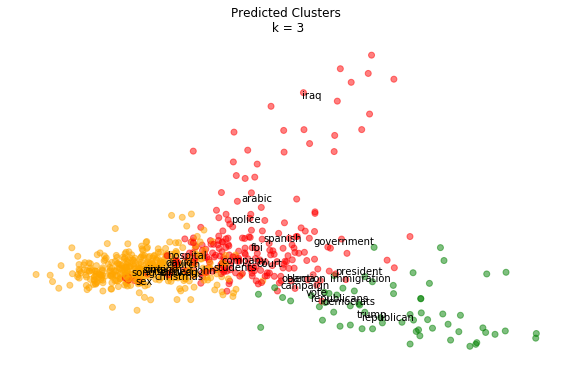

In [196]:
clust_num = 3
km_clf = cluster_fns.make_train(clust_num, epTFVects, 'km')
labels = km_clf.labels_
cluster_fns.pca_and_plot(epTFVects, epTFVectorizer, km_clf, 'km', clust_num, labels)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


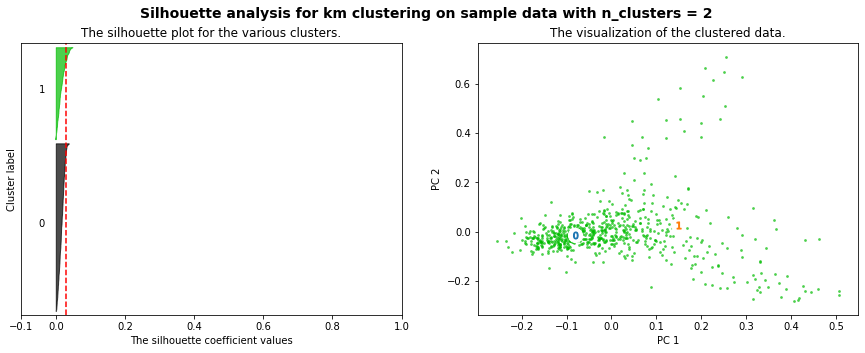

For n_clusters = 2, The average silhouette_score is : 0.030


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


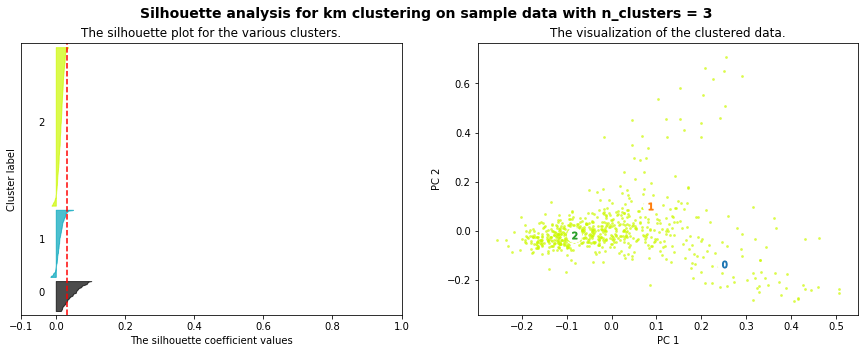

For n_clusters = 3, The average silhouette_score is : 0.031


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


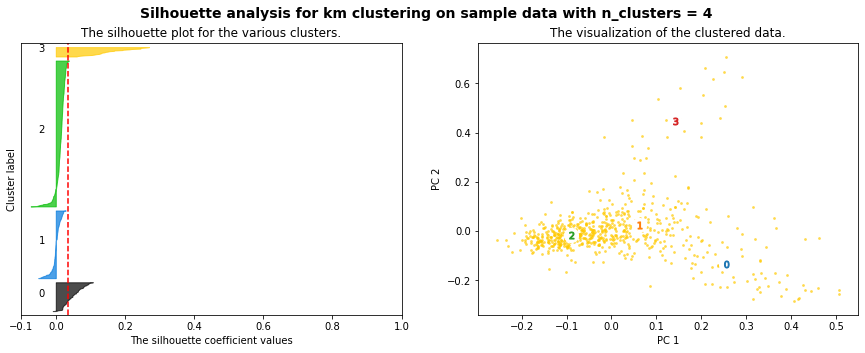

For n_clusters = 4, The average silhouette_score is : 0.035


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


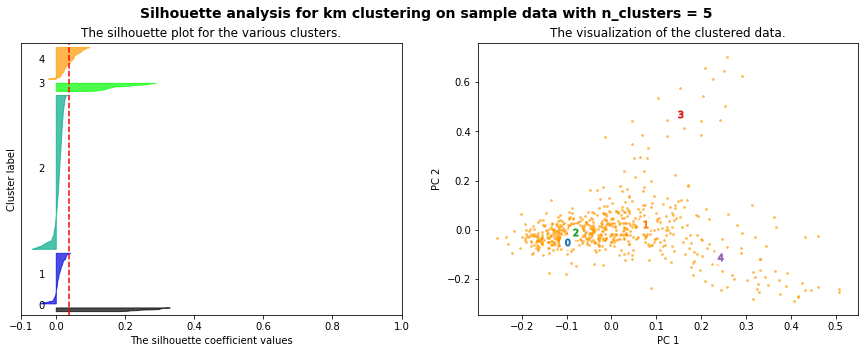

For n_clusters = 5, The average silhouette_score is : 0.039


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


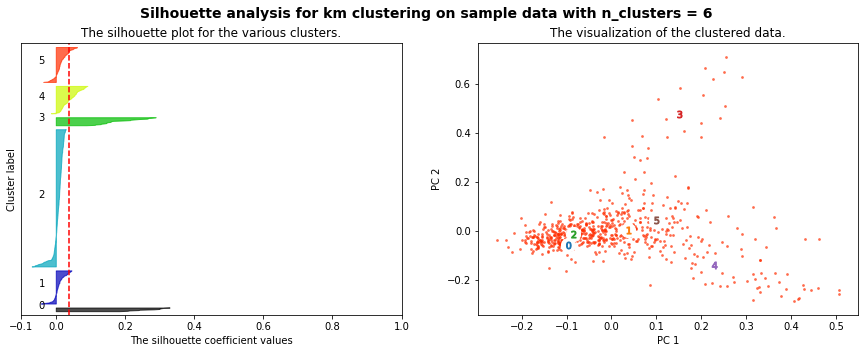

For n_clusters = 6, The average silhouette_score is : 0.039


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


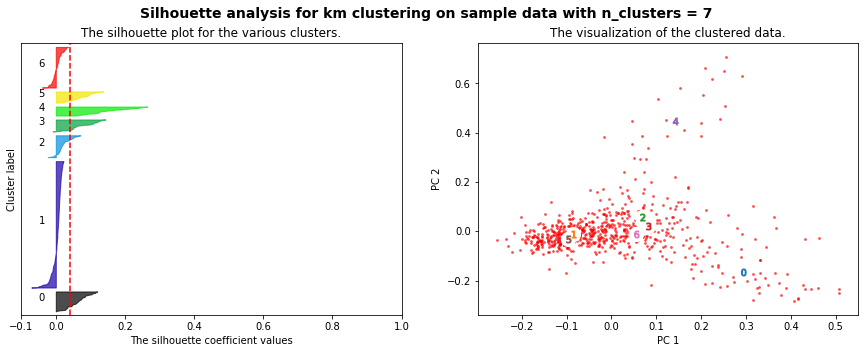

For n_clusters = 7, The average silhouette_score is : 0.040


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


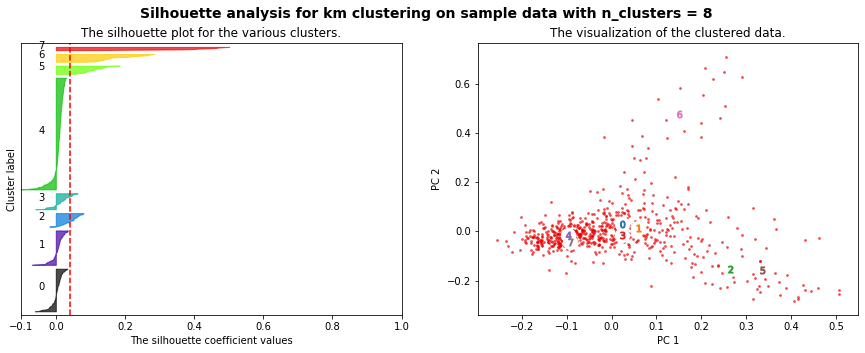

For n_clusters = 8, The average silhouette_score is : 0.040


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


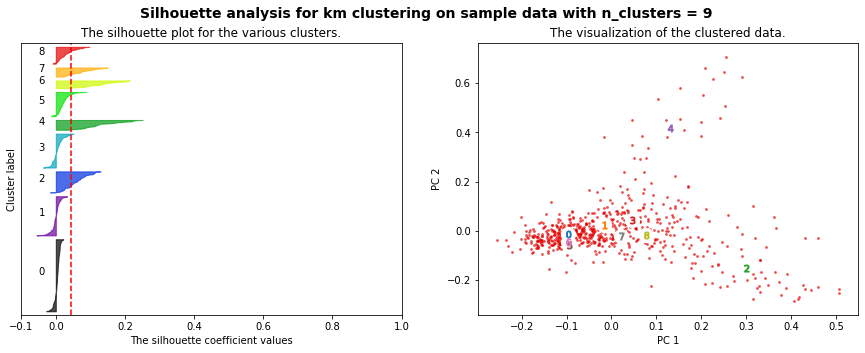

For n_clusters = 9, The average silhouette_score is : 0.043


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


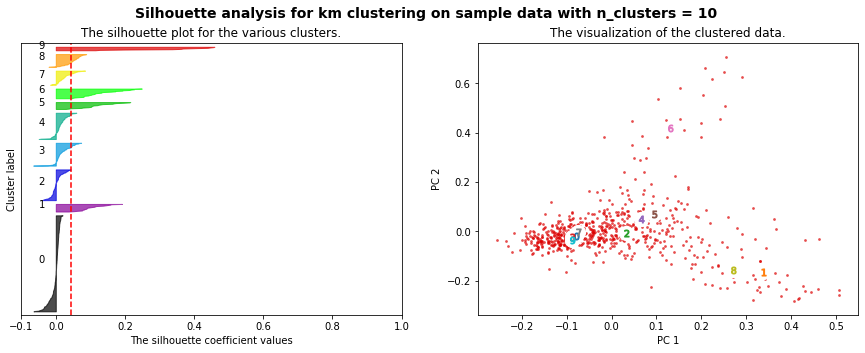

For n_clusters = 10, The average silhouette_score is : 0.043


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


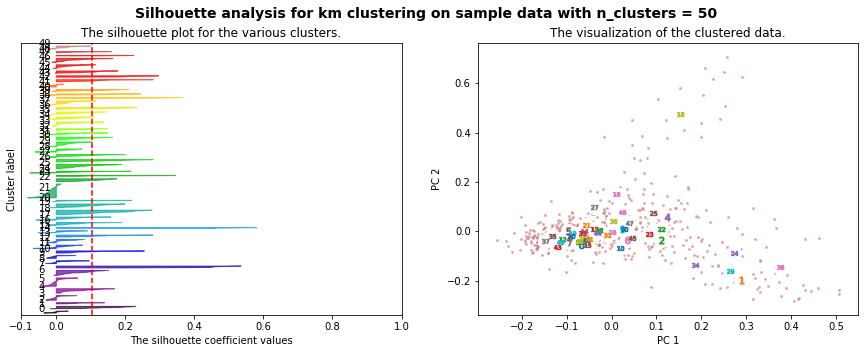

For n_clusters = 50, The average silhouette_score is : 0.105


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


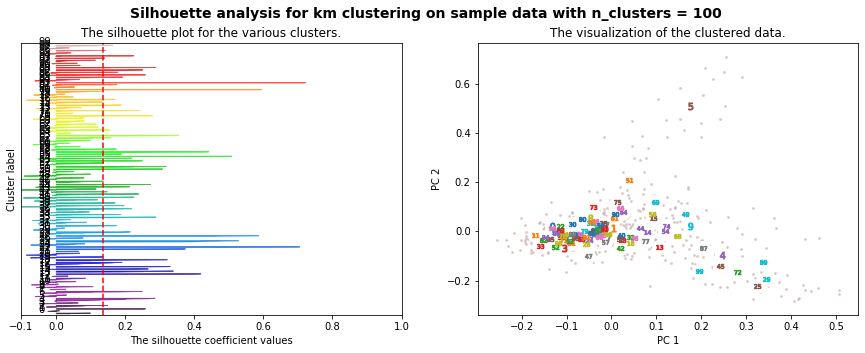

For n_clusters = 100, The average silhouette_score is : 0.137


In [59]:
range_lst = list(range(2, 11)) + [50, 100] 
for i in range_lst:
    X = epTFVects.toarray()
    cluster_fns.plotSilhouette(i, X, 'km', epTFVects)

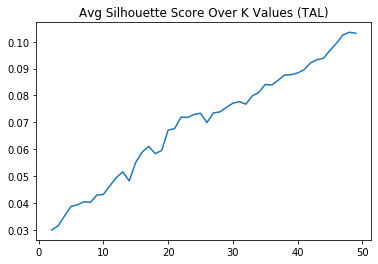

In [60]:
cluster_fns.plot_avg_sil(epTFVects, 'km')

#### DBSCAN

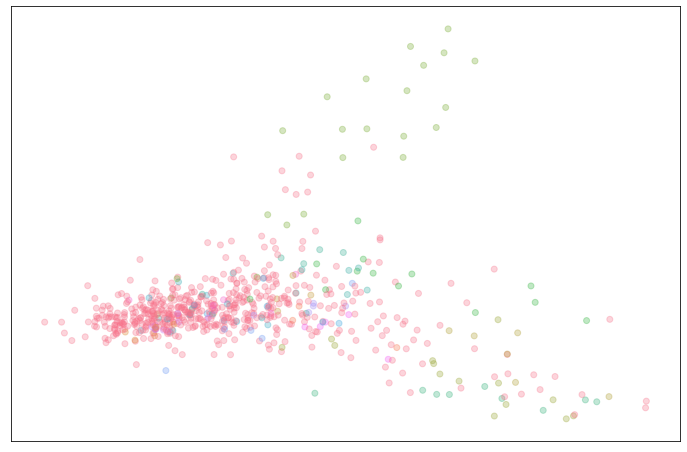

In [216]:
dbscan_clf = cluster_fns.make_train(3, epTFVects, 'dbscan')
labels = dbscan_clf.labels_
cluster_fns.plot_dbscan(epTFVects, epTFVectorizer, labels)

In [217]:
sklearn.metrics.silhouette_score(epTFVects.toarray(), labels, metric='cosine')

0.013263151123755328

DSCAN says 17 clusters best but also score isn't super high

### Hierarchical

In [218]:
pro_cooc_mat, pro_linkage_mat = cluster_fns.make_coor_mat(proTFVects)

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


hier
{'get_leaves': True, 'p': 4, 'truncate_mode': 'level'}


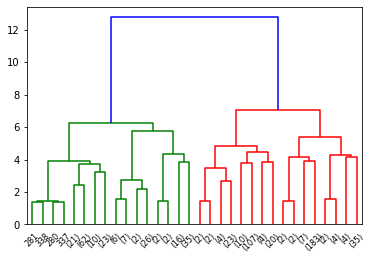

In [219]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'hier')

In [220]:
cluster_fns.make_dendos(pro_cooc_mat, pro_linkage_mat, 'flat')

flat
{'criterion': 'maxclust', 't': 2}
0.09753166625879549
flat
{'criterion': 'maxclust', 't': 4}
0.04458671798886995
flat
{'criterion': 'maxclust', 't': 6}
0.03790307549757094
flat
{'criterion': 'distance', 't': 2}
0.048382316383108845
flat
{'criterion': 'distance', 't': 4}
0.04123805795208006
flat
{'criterion': 'distance', 't': 6}
0.04458671798886995


## Topic Modeling

from: https://www.thoughtvector.io/blog/lda-alpha-and-beta-parameters-the-intuition/
for symmetric Distribution:
If you don’t know whether your LDA distribution is symmetric or asymmetric, it’s most likely symmetric. Here, alpha represents document-topic density - with a higher alpha, documents are made up of more topics, and with lower alpha, documents contain fewer topics. Beta represents topic-word density - with a high beta, topics are made up of most of the words in the corpus, and with a low beta they consist of few words.


from https://stats.stackexchange.com/questions/37405/natural-interpretation-for-lda-hyperparameters:
Unless something else is specified, most implementations of LDA assume the distribution is symmetric.

For the symmetric distribution, a high alpha-value means that each document is likely to contain a mixture of most of the topics, and not any single topic specifically. A low alpha value puts less such constraints on documents and means that it is more likely that a document may contain mixture of just a few, or even only one, of the topics. Likewise, a high beta-value means that each topic is likely to contain a mixture of most of the words, and not any word specifically, while a low value means that a topic may contain a mixture of just a few of the words.

--> I think we should have symmetric alpha & high beta/eta is ours as TAL is themed each week

### By episode

In [63]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

In [64]:
ep_df['reduced_tokens'] = ep_df['normalized_tokens']. \
                               apply(lambda x: dropMissing(x,
                                                 epTFVectorizer.vocabulary_.keys()))

In [142]:
ep_dict, ep_lda = cluster_fns.make_lda_model(ep_df, 'reduced_tokens')

In [143]:
ep_ldaDF = cluster_fns.make_top_probs_df(ep_df, 'ep_title', ep_dict, ep_lda, 'reduced_tokens')
ep_ldaDF

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,A Better Mousetrap,"[(8, 0.39576733)]",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.395767,0.0
1,A Better Mousetrap 2008,"[(5, 0.7941826)]",0.000000,0.000000,0.0,0.000000,0.000000,0.794183,0.000000,0.000000,0.000000,0.0
2,A Front,"[(4, 0.39466992), (5, 0.3233688)]",0.000000,0.000000,0.0,0.000000,0.394670,0.323369,0.000000,0.000000,0.000000,0.0
3,A House Divided,"[(0, 0.39972734), (1, 0.28220317)]",0.399727,0.282203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,A Little Bit of Knowledge,"[(4, 0.81006265)]",0.000000,0.000000,0.0,0.000000,0.810063,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
672,Years Later,"[(3, 0.37461224)]",0.000000,0.000000,0.0,0.374612,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
673,You Are Here,"[(6, 0.4239744), (8, 0.29541615)]",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.423974,0.000000,0.295416,0.0
674,You Are So Beautiful…To Me,"[(7, 0.406319), (8, 0.26222327)]",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.406319,0.262223,0.0
675,You Gonna Eat That?,"[(8, 0.420714)]",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.420714,0.0


In [144]:
word_ranks = cluster_fns.make_topic_df(ep_lda)
print(word_ranks)

     Topic_0   Topic_1     Topic_2  Topic_3 Topic_4  Topic_5 Topic_6  \
0  president  hospital       begin   parent  decide     bank  parent   
1     parent    doctor         die    begin     lie   police     die   
2    teacher     begin       build     song    drug    begin    lose   
3     police    decide      decide    laugh   begin  officer    drug   
4       lose   company       shoot    throw  parent  company   begin   
5      build    health        dole      die     die   decide   build   
6      begin    police   president   letter    lose    court    grow   
7      shoot       die        grow   police    grow   letter  decide   
8       vote     build  government     wear   shoot    issue   court   
9     letter   patient       laugh  student   judge      die    sell   

      Topic_7 Topic_8     Topic_9  
0      parent    lose        lose  
1  government   drink      parent  
2   christmas  parent      police  
3     company  church         die  
4       begin    john  gove

In [145]:
print(ep_lda.print_topics(num_topics=10, num_words=3))

[(0, '0.009*"president" + 0.007*"parent" + 0.007*"teacher"'), (1, '0.009*"hospital" + 0.009*"doctor" + 0.007*"begin"'), (2, '0.007*"begin" + 0.007*"die" + 0.006*"build"'), (3, '0.007*"parent" + 0.007*"begin" + 0.007*"song"'), (4, '0.008*"decide" + 0.006*"lie" + 0.006*"drug"'), (5, '0.011*"bank" + 0.009*"police" + 0.007*"begin"'), (6, '0.008*"parent" + 0.007*"die" + 0.006*"lose"'), (7, '0.008*"parent" + 0.008*"government" + 0.007*"christmas"'), (8, '0.009*"lose" + 0.008*"drink" + 0.008*"parent"'), (9, '0.008*"lose" + 0.007*"parent" + 0.007*"police"')]


Above, we see how are topics are made, i.e. the weight of the words for each topic. These look pretty low which is why in the cells below we first look at a smaller number of topics and then we make lda models w/ a tf-idf corpus.

In [146]:
ep_dict7, ep_lda7 = cluster_fns.make_lda_model(ep_df, 'reduced_tokens', 7)
word_ranks = cluster_fns.make_topic_df(ep_lda7)
print(word_ranks)

     Topic_0 Topic_1     Topic_2  Topic_3     Topic_4  Topic_5     Topic_6
0     police   begin     company      die      parent   parent       begin
1      shoot  decide  government    begin      decide     lose      decide
2     parent  parent       begin    build      police  chicken      parent
3      begin  letter      decide   parent       court    build      letter
4       grow   laugh        drug    drink       begin   follow        wear
5       lose    vote        lose  company       drink     sell        song
6        gun   court        sell     lose        lose      die        john
7    student    matt   president     grow         die    begin        lose
8      build   david       court     camp  government      lie  government
9  christmas   sarah     student     pass     teacher    shoot       laugh


In [149]:
print(ep_lda7.print_topics(num_topics=7, num_words=3))

[(0, '0.008*"police" + 0.007*"shoot" + 0.007*"parent"'), (1, '0.007*"begin" + 0.007*"decide" + 0.006*"parent"'), (2, '0.010*"company" + 0.007*"government" + 0.007*"begin"'), (3, '0.009*"die" + 0.007*"begin" + 0.006*"build"'), (4, '0.007*"parent" + 0.007*"decide" + 0.007*"police"'), (5, '0.010*"parent" + 0.007*"lose" + 0.005*"chicken"'), (6, '0.007*"begin" + 0.006*"decide" + 0.005*"parent"')]


In [147]:
ep_dict5, ep_lda5 = cluster_fns.make_lda_model(ep_df, 'reduced_tokens', 5)
word_ranks = cluster_fns.make_topic_df(ep_lda5)
print(word_ranks)

      Topic_0  Topic_1    Topic_2  Topic_3     Topic_4
0      parent   police      begin      die       begin
1        lose   church     police    begin  government
2       shoot    build     parent   parent      parent
3       begin  company        lie   decide        lose
4      decide   parent     decide    shoot       court
5  government  student      drink    build        grow
6        sell     lose  president  company     company
7      doctor   decide       lose  student        john
8    hospital    laugh     letter     lose       laugh
9        song    begin       sell  chicken       drink


In [148]:
ep_dict3, ep_lda3 = cluster_fns.make_lda_model(ep_df, 'reduced_tokens', 3)
word_ranks = cluster_fns.make_topic_df(ep_lda3)
print(word_ranks)

      Topic_0     Topic_1 Topic_2
0   president        lose  parent
1       begin       begin   begin
2      police       shoot  letter
3      parent      decide     die
4  government         die    sell
5     student      police  decide
6       drink     company    grow
7        vote       build   laugh
8        lose  government    bank
9      decide       court   build


In [150]:
print(ep_lda3.print_topics(num_topics=3, num_words=3))

[(0, '0.008*"president" + 0.006*"begin" + 0.006*"police"'), (1, '0.007*"lose" + 0.006*"begin" + 0.006*"shoot"'), (2, '0.009*"parent" + 0.007*"begin" + 0.006*"letter"')]


We are getting a lot of words that in multiple topics and these are not just homographs, so let's trying doing some topicmodeling with tf-idf corpus to weed out some very common words (also still freaking low percentage per word)

In [153]:
dictionary, corpus = cluster_fns.make_dictionary(ep_df, 'reduced_tokens')
# filter extreme vals (filter out words in fewer than 15 eps and more than 1/2 the documents )
dictionary.filter_extremes(no_below=15, no_above=0.5)
bow_corpus = [dictionary.doc2bow(doc) for doc in ep_df['reduced_tokens']]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [156]:
# okay now let's rerun
lda_model_tfidf10 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [158]:
word_ranks = cluster_fns.make_topic_df(lda_model_tfidf10)
print(word_ranks)

     Topic_0  Topic_1  Topic_2 Topic_3   Topic_4     Topic_5      Topic_6  \
0       iraq     josh  chicken     tim   library         fbi  immigration   
1      iraqi     bank     aunt  daniel       map          al      spanish   
2      chris  spanish  georgia  mccain       mrs        drug        trump   
3  christmas      sex     penn  bridge   chicken       obama       church   
4       gang  sinatra    trump   jason       lee       sarah    insurance   
5       alex   church    mayor    alex     david       trump          sam   
6   military      bob    jimmy     fbi      dave       judge       prison   
7       josh      amy     dave     amy     chris       court       border   
8       dave     adam    uncle  island  computer  republican        susan   
9      court     mike      bus    jeff      mary        vote       mexico   

    Topic_7      Topic_8      Topic_9  
0   teacher        santa      missile  
1      song         bird      anthony  
2     david      chicken        

In [159]:
print(lda_model_tfidf10.print_topics(num_topics=10, num_words=3))

[(0, '0.020*"iraq" + 0.014*"iraqi" + 0.012*"chris"'), (1, '0.010*"josh" + 0.007*"bank" + 0.006*"spanish"'), (2, '0.012*"chicken" + 0.012*"aunt" + 0.011*"georgia"'), (3, '0.011*"tim" + 0.011*"daniel" + 0.009*"mccain"'), (4, '0.009*"library" + 0.007*"map" + 0.006*"mrs"'), (5, '0.014*"fbi" + 0.007*"al" + 0.007*"drug"'), (6, '0.013*"immigration" + 0.011*"spanish" + 0.010*"trump"'), (7, '0.004*"teacher" + 0.004*"song" + 0.004*"david"'), (8, '0.014*"santa" + 0.011*"bird" + 0.010*"chicken"'), (9, '0.009*"missile" + 0.009*"anthony" + 0.008*"vote"')]


Okay, so these topics aren't perfect but the words are worth more for each topic! Let's do some refinement below.

In [160]:
lda_model_tfidf5 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5,
                                              id2word=dictionary, passes=2, workers=4)
word_ranks = cluster_fns.make_topic_df(lda_model_tfidf5)
print(word_ranks)

  Topic_0     Topic_1    Topic_2  Topic_3      Topic_4
0  church        iraq      chris     josh        trump
1    song       iraqi       adam   george        santa
2  police        vote     israel      sam   republican
3     gay       jimmy    teacher  chicken    christmas
4    drug       sarah      china      sex        jason
5  prison         map  insurance     paul  immigration
6    dave       mayor        mrs    david          joe
7    mike    election   hospital      bob       donald
8    bird  republican       aunt    dance          fbi
9  animal        ship       bank  library        agent


In [162]:
print(lda_model_tfidf5.print_topics(num_topics=5, num_words=3))

[(0, '0.005*"church" + 0.004*"song" + 0.004*"police"'), (1, '0.022*"iraq" + 0.013*"iraqi" + 0.008*"vote"'), (2, '0.008*"chris" + 0.007*"adam" + 0.006*"israel"'), (3, '0.011*"josh" + 0.007*"george" + 0.006*"sam"'), (4, '0.012*"trump" + 0.006*"santa" + 0.006*"republican"')]


So I feel like this kinda reflects what we were seeing w/ flat clustering: some of these words are really strong and important and topic groups are just a cluster of crap.

In [195]:
dictionary, corpus = cluster_fns.make_dictionary(ep_df, 'reduced_tokens')
# filter extreme vals (filter out words in fewer than 15 eps and more than 1/2 the documents )
dictionary.filter_extremes(no_below=5, no_above=0.5)
bow_corpus = [dictionary.doc2bow(doc) for doc in ep_df['reduced_tokens']]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [167]:
lda_tfidf5 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5,
                                        id2word=dictionary, passes=2, workers=4)
word_ranks = cluster_fns.make_topic_df(lda_tfidf5)
print(word_ranks)

   Topic_0     Topic_1      Topic_2   Topic_3      Topic_4
0  chicken        iraq         josh      dave        trump
1      tim       iraqi  immigration       mrs         vote
2     bird     spanish          gay        dr          sex
3       al        camp       police      song   republican
4    truck        bank          fbi      adam        chris
5    santa  government         boat   teacher       church
6     gang    mortgage         alex    doctor  republicans
7   police         sam        court  hospital     election
8  missile      border         ship   patient   democratic
9    jason      george      georgia    church          joe


In [168]:
print(lda_tfidf5.print_topics(num_topics=5, num_words=3))

[(0, '0.010*"chicken" + 0.007*"tim" + 0.007*"bird"'), (1, '0.010*"iraq" + 0.006*"iraqi" + 0.006*"spanish"'), (2, '0.007*"josh" + 0.007*"immigration" + 0.007*"gay"'), (3, '0.007*"dave" + 0.005*"mrs" + 0.005*"dr"'), (4, '0.009*"trump" + 0.009*"vote" + 0.009*"sex"')]


In [172]:
lda_tfidf7 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=7,
                                        id2word=dictionary, passes=2, workers=4)
word_ranks = cluster_fns.make_topic_df(lda_tfidf7)
print(word_ranks)
print(lda_tfidf7.print_topics(num_topics=7, num_words=3))

      Topic_0 Topic_1  Topic_2      Topic_3    Topic_4    Topic_5      Topic_6
0        bank    iraq  anthony          gay     church    chicken        trump
1    mortgage   larry  missile     marriage      chris       song        chris
2  government   iraqi     gang          bob       iraq      david      spanish
3      prison      dr   island       robert      sarah     doctor  immigration
4         fbi  bridge      jon    christmas        gay   hospital   republican
5    governor  police    plant         song        ben       bird         vote
6        mike    ship   jewish          ron       vote     animal        jason
7     economy     bob      map         dole     police  christmas        mayor
8      crisis     mrs     boat  grandfather  christian        sex        china
9     teacher      al     alex      teacher        sex    patient       border
[(0, '0.011*"bank" + 0.009*"mortgage" + 0.008*"government"'), (1, '0.013*"iraq" + 0.011*"larry" + 0.008*"iraqi"'), (2, '0.013*"anth

Our topics above aren't terrible.

In [296]:
dictionary, corpus = cluster_fns.make_dictionary(ep_df, 'reduced_tokens')
# filter extreme vals (filter out words in fewer than 15 eps and more than 1/2 the documents )
dictionary.filter_extremes(no_below=10, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in ep_df['reduced_tokens']]
# tfidf = models.TfidfModel(bow_corpus)
# corpus_tfidf = tfidf[bow_corpus]

In [297]:
lda_tfidf6 = gensim.models.LdaMulticore(bow_corpus, num_topics=6,
                                        id2word=dictionary, passes=2, workers=4)
word_ranks = cluster_fns.make_topic_df(lda_tfidf6)
print(word_ranks)
print(lda_tfidf6.print_topics(num_topics=6, num_words=3))

      Topic_0     Topic_1    Topic_2     Topic_3       Topic_4     Topic_5
0     chicken        bank        bob     teacher        church      police
1  government       david     church        vote          song       court
2       chris       sarah        sex        john          camp       judge
3         gun  government       vote        song     christmas     officer
4       email     spanish     health       trump           gay  government
5       video       plant  insurance      police  neighborhood        iraq
6      doctor    mortgage      david     michael          john       crime
7         fbi  restaurant       drug       board           bus  department
8        alex      memory     doctor  republican    republican        drug
9       agent      market   campaign      daniel          vote         cop
[(0, '0.014*"chicken" + 0.010*"government" + 0.009*"chris"'), (1, '0.014*"bank" + 0.010*"david" + 0.008*"sarah"'), (2, '0.010*"bob" + 0.009*"church" + 0.008*"sex"'), (3, '0.01

Next I want to show that each episode can be modeled using the topics above.

In [300]:
lda6_df = cluster_fns.make_top_probs_df(ep_df, 'ep_title',
                                        dictionary, lda_tfidf6, 'reduced_tokens')
lda6_df

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,A Better Mousetrap,"[(0, 0.034149177), (1, 0.092441685), (2, 0.021...",0.034149,0.092442,0.021462,0.600575,0.251173,0.000000
1,A Better Mousetrap 2008,"[(1, 0.50993156), (3, 0.48351118)]",0.000000,0.509932,0.000000,0.483511,0.000000,0.000000
2,A Front,"[(0, 0.716999), (5, 0.28184706)]",0.716999,0.000000,0.000000,0.000000,0.000000,0.281847
3,A House Divided,"[(0, 0.024107913), (2, 0.1255467), (3, 0.65912...",0.024108,0.000000,0.125547,0.659130,0.190449,0.000000
4,A Little Bit of Knowledge,"[(0, 0.14323732), (2, 0.8551931)]",0.143237,0.000000,0.855193,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
672,Years Later,"[(3, 0.021770637), (4, 0.09907963), (5, 0.8785...",0.000000,0.000000,0.000000,0.021771,0.099080,0.878530
673,You Are Here,"[(1, 0.99781936)]",0.000000,0.997819,0.000000,0.000000,0.000000,0.000000
674,You Are So Beautiful…To Me,"[(1, 0.9977398)]",0.000000,0.997740,0.000000,0.000000,0.000000,0.000000
675,You Gonna Eat That?,"[(0, 0.06436994), (1, 0.66067725), (4, 0.27285...",0.064370,0.660677,0.000000,0.000000,0.272856,0.000000


In [302]:
lda_tfidf6.save("lda_tfidf6.model")

In [357]:
dictionary, corpus = cluster_fns.make_dictionary(ep_df, 'reduced_tokens')
# filter extreme vals (filter out words in fewer than 15 eps and more than 1/2 the documents )
dictionary.filter_extremes(no_below=5, no_above=0.90, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in ep_df['reduced_tokens']]

In [308]:
lda_tfidf6 = gensim.models.LdaMulticore(bow_corpus, num_topics=6,
                                        id2word=dictionary, passes=5,
                                        workers=4)
word_ranks = cluster_fns.make_topic_df(lda_tfidf6)
print(word_ranks)
print(lda_tfidf6.print_topics(num_topics=6, num_words=3))

  Topic_0   Topic_1     Topic_2    Topic_3     Topic_4     Topic_5
0  letter   chicken        vote     police  government        bank
1  parent   company      church      drink       court        sell
2    song     chris  republican      shoot        drug     company
3   laugh      bird   president     parent      police  government
4    wear       die         gay  christmas   president    mortgage
5     die    doctor    campaign        die       judge        mike
6    grow  hospital   political    student     spanish       build
7   david   library        john        gun      report      market
8   build   sinatra       issue      throw  department         low
9     lie      sell    election    officer        iraq        grow
[(0, '0.009*"letter" + 0.009*"parent" + 0.008*"song"'), (1, '0.021*"chicken" + 0.014*"company" + 0.012*"chris"'), (2, '0.017*"vote" + 0.013*"church" + 0.012*"republican"'), (3, '0.013*"police" + 0.011*"drink" + 0.009*"shoot"'), (4, '0.013*"government" + 0.011*"co

In [363]:
lda_tfidf6 = gensim.models.LdaMulticore(bow_corpus, num_topics=6,
                                        id2word=dictionary, passes=5,
                                        workers=4)
word_ranks = cluster_fns.make_topic_df(lda_tfidf6)
print(word_ranks)
print(lda_tfidf6.print_topics(num_topics=6, num_words=3))

  Topic_0     Topic_1   Topic_2      Topic_3  Topic_4     Topic_5
0  parent     chicken   student    president     drug     company
1     die   christmas    doctor         vote    court        bank
2  letter        bird     drink   government    mayor        sell
3    grow       santa      iraq       police      bob  government
4   shoot      animal  hospital      spanish      gay      market
5   laugh         dog    parent        trump     dave    mortgage
6    wear        dole     study   republican    build       build
7  church     missile     build        issue    china         joe
8   david        tree       die   department  chinese       plant
9    park  convention     sarah  immigration      die       chris
[(0, '0.011*"parent" + 0.009*"die" + 0.007*"letter"'), (1, '0.021*"chicken" + 0.018*"christmas" + 0.013*"bird"'), (2, '0.010*"student" + 0.009*"doctor" + 0.008*"drink"'), (3, '0.015*"president" + 0.013*"vote" + 0.010*"government"'), (4, '0.012*"drug" + 0.009*"court" + 0.007

In [364]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_tfidf6,
                              corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [365]:
lda6_tfi_df = cluster_fns.make_top_probs_df(ep_df, 'ep_title',
                                            dictionary, lda_tfidf6, 'reduced_tokens')
lda6_tfi_df

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,A Better Mousetrap,"[(0, 0.3466698), (1, 0.15367097), (2, 0.046443...",0.346670,0.153671,0.046443,0.000000,0.000000,0.447845
1,A Better Mousetrap 2008,"[(1, 0.10595776), (3, 0.061844893), (5, 0.8318...",0.000000,0.105958,0.000000,0.061845,0.000000,0.831857
2,A Front,"[(3, 0.7665584), (4, 0.15755214), (5, 0.070784...",0.000000,0.000000,0.000000,0.766558,0.157552,0.070785
3,A House Divided,"[(0, 0.099473715), (1, 0.30214888), (2, 0.1504...",0.099474,0.302149,0.150464,0.413921,0.000000,0.033711
4,A Little Bit of Knowledge,"[(0, 0.44842085), (1, 0.15962687), (4, 0.39111...",0.448421,0.159627,0.000000,0.000000,0.391119,0.000000
...,...,...,...,...,...,...,...,...
672,Years Later,"[(1, 0.57687753), (3, 0.13631125), (4, 0.28285...",0.000000,0.576878,0.000000,0.136311,0.282851,0.000000
673,You Are Here,"[(0, 0.28719735), (2, 0.71158344)]",0.287197,0.000000,0.711583,0.000000,0.000000,0.000000
674,You Are So Beautiful…To Me,"[(0, 0.112958856), (1, 0.25381806), (2, 0.6323...",0.112959,0.253818,0.632350,0.000000,0.000000,0.000000
675,You Gonna Eat That?,"[(0, 0.6382948), (2, 0.3560769)]",0.638295,0.000000,0.356077,0.000000,0.000000,0.000000


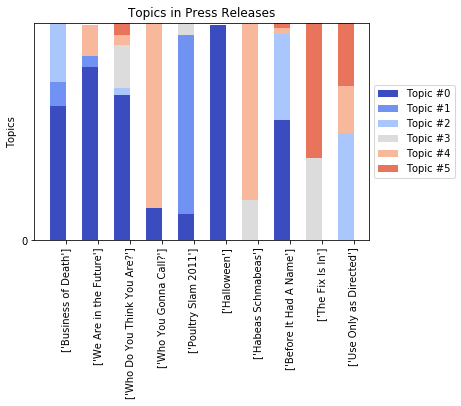

  Topic_0     Topic_1   Topic_2      Topic_3  Topic_4     Topic_5
0  parent     chicken   student    president     drug     company
1     die   christmas    doctor         vote    court        bank
2  letter        bird     drink   government    mayor        sell
3    grow       santa      iraq       police      bob  government
4   shoot      animal  hospital      spanish      gay      market
5   laugh         dog    parent        trump     dave    mortgage
6    wear        dole     study   republican    build       build
7  church     missile     build        issue    china         joe
8   david        tree       die   department  chinese       plant
9    park  convention     sarah  immigration      die       chris


In [367]:
### samp_num = 10 
samp = lda6_tfi_df.sample(samp_num)
ldaDFV = samp[['topic_%d' %x for x in range(6)]]
ldaDFVisN = samp[['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
cluster_fns.plot_stacked_heat(lda_tfidf6, ldaDFVis, ldaDFVisNames, samp_num)

It's going to be impossible to check out every episode, so I'm moving onto looking at year over year change of topics.

### By year

In [381]:
for year in sorted(ep_df['year'].unique()):
    print(year)
    if year != 1995:
        by_year = ep_df[ep_df['year'] == year]
        print(by_year.shape)
        yearTFVectorizer, yearTFVects = cluster_fns.make_vec_vectorizer(by_year)
        by_year['reduced_tokens'] = by_year['normalized_tokens']. \
                               apply(lambda x: dropMissing(x,
                                                 yearTFVectorizer.vocabulary_.keys()))
        yearTFVectorizer, yearTFVects = cluster_fns.make_vec_vectorizer(by_year)
        dictionary, corpus = cluster_fns.make_dictionary(by_year, 'reduced_tokens')
        dictionary.filter_extremes(keep_n=100000)
        bow_corpus = [dictionary.doc2bow(doc) for doc in by_year['reduced_tokens']]
        lda_yr = gensim.models.LdaMulticore(bow_corpus, num_topics=5,
                                                id2word=dictionary, passes=5,
                                                workers=4)
        word_ranks = cluster_fns.make_topic_df(lda_yr)
        print(word_ranks)
        print(lda_yr.print_topics(num_topics=5, num_words=3))
        print()

1995
1996
(39, 12)


/Users/katykoeing/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


     Topic_0     Topic_1    Topic_2     Topic_3    Topic_4
0      davis        dawn      santa        dole        gay
1      actor        bull       dawn         bob     church
2     lesson  basketball     cancer  convention       dave
3    theater        band    chicken    campaign     museum
4       swim       jesus  christmas     clinton        bob
5        gun       bleep       pier  republican        mrs
6   mountain     michael     doctor   president  situation
7  obsession       devil       jack      worker       size
8     church      jordan        fan  restaurant         ad
9       liar      spirit        cat   political  playhouse
[(0, '0.012*"davis" + 0.011*"actor" + 0.010*"lesson"'), (1, '0.019*"dawn" + 0.018*"bull" + 0.011*"basketball"'), (2, '0.038*"santa" + 0.032*"dawn" + 0.025*"cancer"'), (3, '0.069*"dole" + 0.028*"bob" + 0.027*"convention"'), (4, '0.028*"gay" + 0.017*"church" + 0.014*"dave"')]

1997
(39, 12)
     Topic_0     Topic_1 Topic_2     Topic_3     Topic_4
0   

   Topic_0     Topic_1      Topic_2       Topic_3    Topic_4
0     iraq   terrorist          bus     christmas     church
1  factory     library    hurricane         jesus      uncle
2    trade  government        storm        murder      jesus
3     bomb      weapon   government  neighborhood  christian
4  soldier       hotel  grandfather         trial  religious
5    iraqi      guilty        plane          mary       test
6     road         lee    apartment           dog      faith
7    truck      attack    emergency         photo    defense
8      joe        rock         land        lawyer      alien
9     test         gay     property         judge      trial
[(0, '0.034*"iraq" + 0.018*"factory" + 0.013*"trade"'), (1, '0.016*"terrorist" + 0.015*"library" + 0.015*"government"'), (2, '0.028*"bus" + 0.020*"hurricane" + 0.019*"storm"'), (3, '0.042*"christmas" + 0.031*"jesus" + 0.019*"murder"'), (4, '0.044*"church" + 0.021*"uncle" + 0.020*"jesus"')]

2006
(17, 12)
    Topic_0   Topic_1  

      Topic_0  Topic_1     Topic_2    Topic_3   Topic_4
0       agent  michael       chris       bank     board
1        mike     boat         bus    teacher  district
2        jail   george        dave     policy    lawyer
3     sheriff    beach         tim    student   student
4      murder     film     richard   conflict      east
5      boston    david      travel      nurse      vote
6        song     road  conference  financial     karen
7  department       ad     product       mike   library
8      arrest   prison       pitch       tony  attorney
9      robert    movie       board         al   private
[(0, '0.042*"agent" + 0.025*"mike" + 0.021*"jail"'), (1, '0.024*"michael" + 0.018*"boat" + 0.017*"george"'), (2, '0.022*"chris" + 0.017*"bus" + 0.012*"dave"'), (3, '0.032*"bank" + 0.027*"teacher" + 0.023*"policy"'), (4, '0.071*"board" + 0.033*"district" + 0.031*"lawyer"')]

2015
(33, 12)
   Topic_0    Topic_1   Topic_2 Topic_3     Topic_4
0  officer  christmas   comment    ship    

So this is pretty cool, right? We can track the importance of the 9/11 and the subsequent wars, the financial crisis of 2008, election seasons.

Next steps: we should take a words within topics and look at coolocations/similar words for important words for each group to see if American thoughts on these topics change year over year.